# 讀取資料

**從Kaggle輸入資料**

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/piyushborhade/salary-of-data-scientists/data'
!pip install opendatasets --upgrade

In [ ]:
import os
import opendatasets as od

od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: atien243
Your Kaggle Key: ··········


100%|██████████| 25.4k/25.4k [00:00<00:00, 2.92MB/s]

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px

將CSV檔放入dataset裡面

In [ ]:
dataset = pd.read_csv("/content/salary-of-data-scientists/ds_salaries.csv")
dataset = dataset.drop(columns=[ 'salary', 'salary_currency'])
#dataset = dataset.drop('employment_type',1)
#dataset = dataset[(dataset.job_title.counts()<20)]

dataset_num = dataset.copy()
#dataset_num = dataset[(dataset['salary_in_usd']>30000)]
#dataset_num["experience_level"].replace(['EN','MI','SE','EX'],[2,6,10,15],inplace=True)
#dataset_num["company_size"].replace(['S','M','L'],[0,1,2],inplace=True)
dataset_num["work_year"].replace([2020,2021,2022,2023],[0,1,2,3],inplace=True)
#dataset_num["job_title"].replace(['Principal Data Scientist','ML Engineer','Data Scientist','Applied Scientist','Research Engineer','Analytics Engineer','Business Intelligence Engineer','Machine Learning Engineer','Data Strategist','Data Engineer'],[1,2,3,4],inplace=True)
dataset.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in dataset.columns.to_list():
    if dataset[col].dtype == 'object':
        dataset_num[col] = le.fit_transform(dataset[col])

# 資料視覺化

薪水分布

<Axes: ylabel='Frequency'>

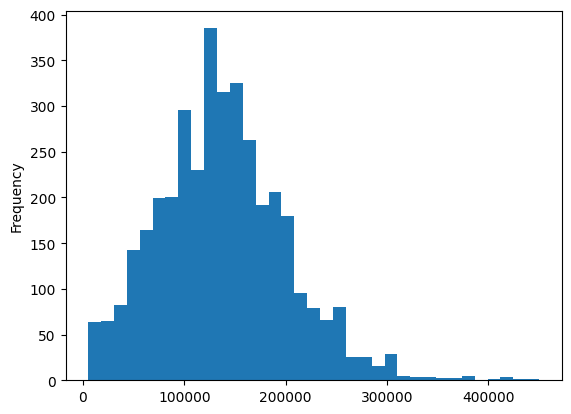

In [ ]:
dataset.salary_in_usd.plot(kind='hist', bins=35)

In [ ]:
df = dataset["company_size"].value_counts().reset_index()
df = df.iloc[:10]
fig = px.pie(df, values='company_size', names='index', title= 'Distribution of company_size',
            color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()
df.head()

,index,company_size
0,M,3153
1,L,454
2,S,148


In [ ]:
df = dataset["job_title"].value_counts().reset_index()
df = df.iloc[:10]
fig = px.pie(df, values='job_title', names='index', title= 'Distribution of job positions',
            color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()
df.head()

,index,job_title
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103


In [ ]:
df = dataset["experience_level"].value_counts().reset_index()
df = df.iloc[:10]
fig = px.pie(df, values='experience_level', names='index', title= 'Distribution of experience_level',
            color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()
df.head()

,index,experience_level
0,SE,2516
1,MI,805
2,EN,320
3,EX,114


In [ ]:
dataset_num = dataset.copy()
dataset_num = dataset[(dataset['employment_type']=="FT")]
dataset_num['job_count'] = dataset_num.groupby(['job_title'])['job_title'].transform('count')
dataset_num =dataset_num[dataset_num['job_count'] >=500]
print(dataset_num)
fig = px.box(dataset_num, x="employment_type", y="salary_in_usd", color="job_title",
            title = 'Salary vs employment_type based on job_title',
            color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(xaxis_title="employment_type", yaxis_title="Salary in USD")
fig.show()

      work_year experience_level employment_type       job_title  \
3          2023               SE              FT  Data Scientist   
4          2023               SE              FT  Data Scientist   
7          2023               SE              FT  Data Scientist   
8          2023               SE              FT  Data Scientist   
9          2023               SE              FT  Data Scientist   
...         ...              ...             ...             ...   
3743       2020               MI              FT   Data Engineer   
3746       2021               MI              FT  Data Scientist   
3748       2021               MI              FT   Data Engineer   
3750       2020               SE              FT  Data Scientist   
3752       2020               EN              FT  Data Scientist   

      salary_in_usd employee_residence  remote_ratio company_location  \
3            175000                 CA           100               CA   
4            120000                 C

<ipython-input-19-1ea085f721b2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.box(dataset, x="remote_ratio", y="salary_in_usd",
            title = 'Salary vs Remote Ratio',
            color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(xaxis_title="Remote Ratio", yaxis_title="Salary in USD")
fig.show()

In [ ]:
fig = px.box(dataset, x="experience_level", y="salary_in_usd", color="company_size",
            title = 'Salary vs Experience level based on Company Size',
            color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(xaxis_title="Experience Level", yaxis_title="Salary in USD")
fig.show()

In [ ]:
#exp_level = dataset['experience_level'].value_counts()
#ax = exp_level.plot(kind='bar',rot=0, color="c")

In [ ]:
sec = dataset.groupby('experience_level')
print(sec.groups["EN"])
print(sec.get_group("SE").salary_in_usd.mean())
print(sec.get_group("MI").salary_in_usd.mean())
print(sec.get_group("EN").salary_in_usd.mean())
print(sec.get_group("EX").salary_in_usd.mean())

Int64Index([  13,   14,   39,   40,   42,   43,   83,   95,   96,  113,
            ...
            3687, 3699, 3705, 3708, 3710, 3724, 3729, 3735, 3752, 3753],
           dtype='int64', length=320)
153051.07154213038
104525.93913043478
78546.284375
194930.9298245614


In [ ]:
exp_level = dataset['company_size'].value_counts()
#ax = exp_level.plot(kind='bar',rot=0, color="c")

In [ ]:
sec = dataset.groupby('company_size')
print(sec.get_group("S").salary_in_usd.mean())
print(sec.get_group("M").salary_in_usd.mean())
print(sec.get_group("L").salary_in_usd.mean())

78226.68243243243
143130.54836663496
118300.98237885462


In [ ]:
#sns.heatmap(dataset_num.corr(), linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

# 資料前處理

In [ ]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [ ]:
def clean_data(df):
    df = (
        df
        .assign(
            is_manager = lambda x: x.job_title.str.lower().str.contains("manager").astype('float'),
            is_principal = lambda x: x.job_title.str.lower().str.contains("principal").astype('float'),
            is_analyst = lambda x: x.job_title.str.lower().str.contains("analyst").astype('float'),
            is_engineer = lambda x: x.job_title.str.lower().str.contains("engineer").astype('float'),
            is_scientist = lambda x: x.job_title.str.lower().str.contains("scientist").astype('float'),
            is_research = lambda x: x.job_title.str.lower().str.contains("research").astype('float'),
            is_architect = lambda x: x.job_title.str.lower().str.contains("architect").astype('float'),
            us_located = lambda x: x.company_location.str.contains('US').astype('float'),
            remote_ratio = lambda x: x.remote_ratio/100,
            salary_in_usd = lambda x: np.log(x.salary_in_usd)
        )  #將工作分類
    )
    df = pd.concat([
        df.drop(columns=['work_year', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence']),
        pd.get_dummies(df['work_year'],drop_first=True, prefix='year', dtype='float'),
        pd.get_dummies(df['experience_level'],drop_first=True, prefix='experience', dtype='float'),
        #pd.get_dummies(df['employee_residence'],drop_first=True, prefix='employee', dtype='float'),
        pd.get_dummies(df['employment_type'],drop_first=True, prefix='employment', dtype='float'),
        #pd.get_dummies(df['company_location'],drop_first=True, prefix='location', dtype='float'),
        pd.get_dummies(df['company_size'],drop_first=True, prefix='size', dtype='float'),
    ], axis=1) #將文字轉成數值

    return df.drop(columns = ['job_title'])


In [ ]:
new_ds = clean_data(dataset)

In [ ]:
new_ds = remove_outliers(dataset,'salary_in_usd')
#new_ds = remove_outliers(dataset,'company_location')
#new_ds = clean_data(new_ds)
new_ds = clean_data(new_ds)
new_ds

,salary_in_usd,remote_ratio,is_manager,is_principal,is_analyst,is_engineer,is_scientist,is_research,is_architect,us_located,...,year_2022,year_2023,experience_EX,experience_MI,experience_SE,employment_FL,employment_FT,employment_PT,size_M,size_S
0,11.360322,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,10.308953,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10.146434,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12.072541,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,11.695247,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,12.013701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3751,11.925035,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3752,11.561716,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3753,11.512925,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='Frequency'>

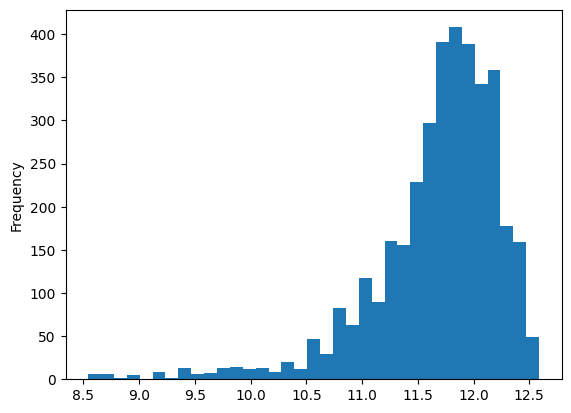

In [ ]:
new_ds.salary_in_usd.plot(kind='hist', bins=35)

工作年份分布

In [ ]:
df = dataset["work_year"].value_counts().reset_index()
df = df.iloc[:10]
fig = px.pie(df, values='work_year', names='index', title= 'Distribution of work year',
            color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()
df.head()

,index,work_year
0,2023,1785
1,2022,1664
2,2021,230
3,2020,76


# 模型測試

Model

In [ ]:
X_train= new_ds.drop(columns=['salary_in_usd'])[new_ds.year_2023==0.0]
X_train= sm.add_constant(X_train)

y_train = new_ds[new_ds.year_2023==0.0].salary_in_usd.values

In [ ]:
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 27 Dec 2023   Prob (F-statistic):          1.25e-285
Time:                        03:27:51   Log-Likelihood:                -1228.8
No. Observations:                1945   AIC:                             2498.
Df Residuals:                    1925   BIC:                             2609.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.1699      0.191     53.315      0.000       9.796      10.544
remote_ratio      0.0054      0.022      0.242      0.809      -0.038       0.049
is_manager        0.1981      0.080      2.477      0.013       0.041       0.355
is_principal      0.4238      0.134      3.158      0.002       0.161       0.687
is_analyst       -0.1914      0.057     -3.360      0.001      -0.303      -0.080
is_engineer       0.0922      0.054      1.723      0.085      -0.013       0.197
is_scientist      0.0839      0.054      1.545      0.123      -0.023       0.191
is_research       0.0547      0.073      0.748      0.454      -0.089       0.198
is_architect      0.1392      0.083      1.677      0.094      -0.024       0.302
us_located        0.7060      0.027     26.068      0.000       0.653       0.759
year_2021         0.0086      0.062      0.138      0.890      -0.113       0.131
year_2022         0.1295      0.059      2.195      0.028       0.014       0.245
year_2023      -4.69e-16   4.87e-17     -9.629      0.000   -5.64e-16   -3.73e-16
experience_EX     0.8312      0.076     10.984      0.000       0.683       0.980
experience_MI     0.3369      0.040      8.474      0.000       0.259       0.415
experience_SE     0.5468      0.039     14.087      0.000       0.471       0.623
employment_FL    -0.2243      0.238     -0.944      0.345      -0.690       0.242
employment_FT     0.3066      0.174      1.764      0.078      -0.034       0.648
employment_PT    -0.2942      0.208     -1.411      0.158      -0.703       0.115
size_M           -0.0157      0.031     -0.503      0.615      -0.077       0.045
size_S           -0.1551      0.049     -3.181      0.001      -0.251      -0.059
==============================================================================
Omnibus:                      406.950   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1462.409
Skew:                          -1.001   Prob(JB):                         0.00
Kurtosis:                       6.747   Cond. No.                     3.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.58e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
results.rsquared

0.5153304749236798

In [ ]:
X_test = new_ds.drop(columns=['salary_in_usd'])[new_ds.year_2023==1.0]
X_test = sm.add_constant(X_test, has_constant='add')

y_test= new_ds[new_ds.year_2023==1.0].salary_in_usd.values

#data = results.get_prediction(X_test).summary_frame(alpha=0.05)

In [ ]:
y = results.predict(X_test)

<ipython-input-44-8cda55be8414>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-44-8cda55be8414>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

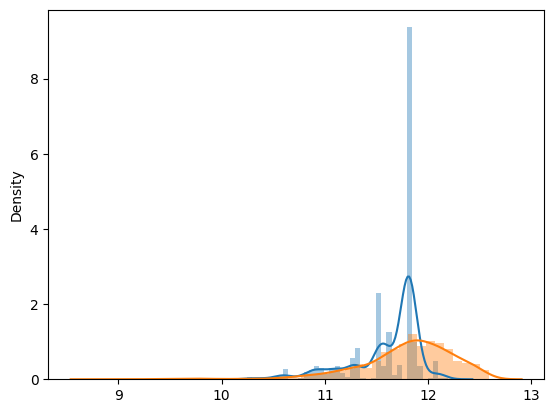

In [ ]:
import seaborn as sns
sns.distplot(y)
sns.distplot(y_test)
#sns.distplot(y-y_test)

<ipython-input-45-ac3eb2cf034e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

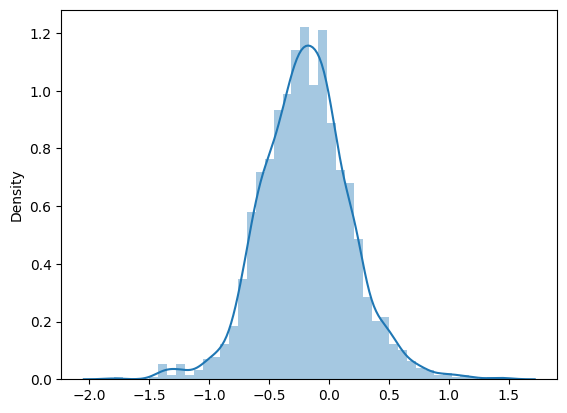

In [ ]:
sns.distplot(y-y_test)

In [ ]:
results.get_prediction(X_test).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.536369,0.144358,11.253255,11.819483,10.595511,12.477227
1,11.155287,0.184233,10.793970,11.516605,10.188018,12.122557
2,11.155287,0.184233,10.793970,11.516605,10.188018,12.122557
3,11.096937,0.066250,10.967006,11.226867,10.190326,12.003547
4,11.096937,0.066250,10.967006,11.226867,10.190326,12.003547
...,...,...,...,...,...,...
1815,11.821524,0.064009,11.695990,11.947058,10.915533,12.727515
1817,11.587674,0.065720,11.458784,11.716565,10.681212,12.494136
1818,11.587674,0.065720,11.458784,11.716565,10.681212,12.494136
1819,11.259087,0.070107,11.121594,11.396580,10.351362,12.166812


# testtttttttttttttt

https://www.kaggle.com/code/aligreualihassan/data-science-salary-regression-prediction

In [ ]:
from sklearn.model_selection import train_test_split


features = new_data.drop("salary_in_usd", axis=1)
target = new_data['salary_in_usd'].values
target_logg = np.log(target)

X_train, X_test, y_train, y_test = train_test_split(features,target_logg,test_size=0.15,random_state=42,shuffle=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown='ignore'),
    StandardScaler(),
#     PCA(n_components=3),
    TruncatedSVD(n_components=2),
    PolynomialFeatures(degree=3),
    KNeighborsRegressor(n_neighbors=10, weights='distance'))

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
comp = np.column_stack((np.exp(y_test), np.exp(preds)))
comp = pd.DataFrame(comp, columns =['actual', 'predicted'])
comp

,actual,predicted
0,168000.0,218010.560665
1,179975.0,112316.432659
2,144000.0,174930.865638
3,222200.0,217589.209774
4,230000.0,34427.786223
...,...,...
559,180000.0,137446.962061
560,120000.0,133312.388284
561,155000.0,153037.168149
562,64385.0,53607.042193


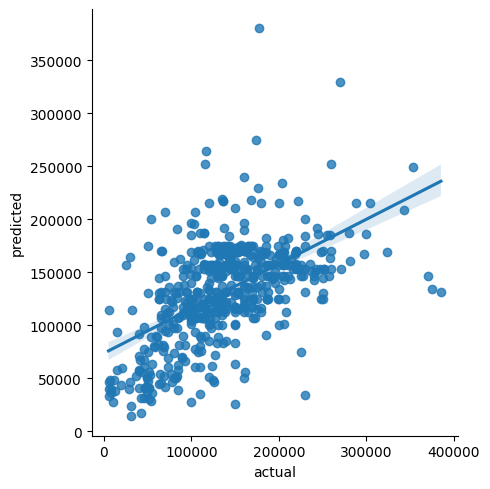

In [ ]:
sns.lmplot(data=comp, x='actual', y='predicted')

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

<ipython-input-159-b5ff44d406f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions)
<ipython-input-159-b5ff44d406f7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)


<Axes: ylabel='Density'>

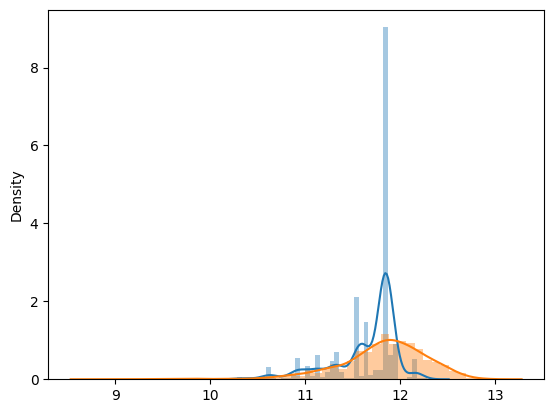

In [ ]:
import seaborn as sns
sns.distplot(predictions)
sns.distplot(y_test)

<ipython-input-160-7994c0437043>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions-y_test)


<Axes: ylabel='Density'>

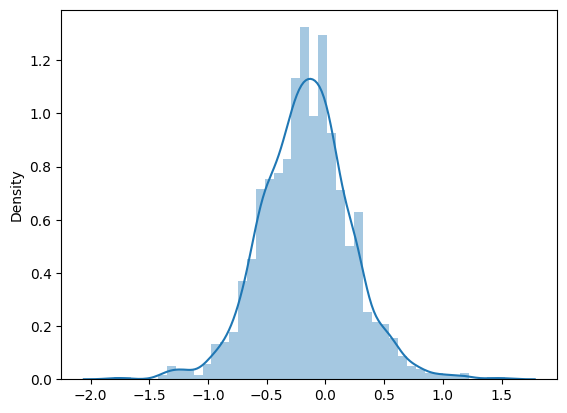

In [ ]:
sns.distplot(predictions-y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error( y_test,predictions))

MSE: 0.16983898289245064


In [ ]:
from sklearn.metrics import mean_squared_error #均方誤差
from sklearn.metrics import mean_absolute_error #平方絕對誤差
from sklearn.metrics import r2_score#R square
#調用
mse = mean_squared_error(predictions, y_test)
mbe = mean_absolute_error(predictions, y_test)
r2 = r2_score( y_test,predictions)

print("MSE: ",mse)
print("MBE: " , mbe)
print("r2: ", r2)

MSE:  0.16983898289245064
MBE:  0.3201419186282983
r2:  0.268534733954678
